In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = [[0.346,0.780], [0.303,0.439],[0.358,0.729],[0.602,0.863],[0.790,0.753],[0.611,0.965]]
y_train = [0,0,0,1,1,1]

X_test = [[0.959,0.382], [0.750,0.306], [0.395,0.760], [0.823,0.764], [0.761,0.874], [0.844,0.435]]
y_test = [0,0,0,1,1,1]

X_train = np.array(X_train)
Y_train = np.array(y_train)
X_test = np.array(X_test)
Y_test = np.array(y_test)

In [3]:
print('Shape of X_train : ', X_train.shape)
print('Shape of Y_train : ', Y_train.shape)

print('Shape of X_test : ', X_test.shape)
print('Shape of Y_test : ', Y_test.shape)

Shape of X_train :  (6, 2)
Shape of Y_train :  (6,)
Shape of X_test :  (6, 2)
Shape of Y_test :  (6,)


In [4]:
def sigmoid(x):
  return 1/(1+ np.exp(-x))

In [8]:
def model(X,Y,learning_rate=0.01,iter=100):
    m = X_train.shape[1]
    n = X_train.shape[0]
   
    B = -1
    #W = np.zeros((6,1))
    W = np.array([1.5,0.5])

    cost_list =[]

    for i in range(iter):
      for j in range(len(X)):
        Z = np.dot(W,X[j]) + B
        A = sigmoid(Z)
        dW = (1/m) * np.dot(A-Y[j],X[j])
        dB = (1/m) * np.sum(A-Y[j])
        W = W - learning_rate * dW.T
        B = B - learning_rate * dB
      cost = -(1/m) *np.sum(Y*np.log(sigmoid(np.dot(X,W.T)+B)) + (1-Y)*np.log(1-sigmoid(np.dot(X,W.T)+B)))

      cost_list.append(cost)

      if(i == 1):
        print("W = ", W)
        print("B = ",B)
        print("Cross Entropy Error Function after", i, "iteration is: ", cost)
        print('The logistic model P(y=1|x1,x2) is: \n', A)
      if(i%(iter/10) == 0):
        print("Cross Entropy Error Function after", i, "iteration is: ", cost)

    return W,B,cost_list


In [9]:
iteration = 250000
learning_rate = 0.1
W,B,cost_list = model(X_train,Y_train,learning_rate=learning_rate,iter=iteration)

Cross Entropy Error Function after 0 iteration is:  1.6669074269981987
W =  [1.53612616 0.51739964]
B =  -1.0117732408457443
Cross Entropy Error Function after 1 iteration is:  1.6630660083987943
The logistic model P(y=1|x1,x2) is: 
 0.5936978427941283
Cross Entropy Error Function after 25000 iteration is:  0.028677517117260964
Cross Entropy Error Function after 50000 iteration is:  0.014598707352406442
Cross Entropy Error Function after 75000 iteration is:  0.009805373925452006
Cross Entropy Error Function after 100000 iteration is:  0.007386167210650619
Cross Entropy Error Function after 125000 iteration is:  0.005926471111481545
Cross Entropy Error Function after 150000 iteration is:  0.00494957689906003
Cross Entropy Error Function after 175000 iteration is:  0.004249788296695725
Cross Entropy Error Function after 200000 iteration is:  0.003723764160927053
Cross Entropy Error Function after 225000 iteration is:  0.0033138849426556415


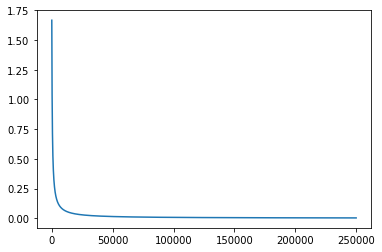

In [10]:
plt.plot(np.arange(iteration),cost_list)

In [11]:
def accuracy(X,Y,W,B):
  Z = np.dot(X,W.T) + B
  A = sigmoid(Z)

  A = A>0.5
  A = np.array(A,dtype="int64")
  print(A)
  print(Y)
  acc = (np.sum(A==Y)/len(Y))*100
  print("Accuracy of the model is : ", acc,"%")

In [12]:
accuracy(X_test,Y_test,W,B)
Z = np.dot(X_test,W.T) + B
A = sigmoid(Z)
A = A>0.5
A = np.array(A,dtype="int64")
A,Y_test

[1 1 0 1 1 1]
[0 0 0 1 1 1]
Accuracy of the model is :  66.66666666666666 %


(array([1, 1, 0, 1, 1, 1]), array([0, 0, 0, 1, 1, 1]))

In [13]:
from sklearn.metrics import classification_report
print('\n\n The solution to 5b(iii) \n',classification_report(Y_test,A))



 The solution to 5b(iii) 
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6

